# ELE2769 -  Remote Sensing Image Analysis - Assignment 1
## Image Correction and Registration

#### Getting Things Set-up:

In [151]:
%matplotlib notebook
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
import sklearn.decomposition
import skimage.filters
from sklearn.decomposition import PCA

In [2]:
%%capture
cd IKONOS_SJC/

Defining Some Functions

In [88]:
def multichannel(chn1, chn2, chn3):
    '''This function takes in 3 same sized channels and puts them together in a single image'''
    if chn1.shape == chn2.shape == chn3.shape:
        im_out = np.zeros(chn1.shape + (3,))
        im_out[:,:,0] = chn1
        im_out[:,:,1] = chn2
        im_out[:,:,2] = chn3
        
        return im_out
    
    else:
        print('The Channels Must be The Same Size')

In [147]:
def pansharpening_HSV(im_in, im_pan):        
    
    if im_in.shape[:2] == im_pan.shape:
        im_in = im_in*255
        im_pan = im_pan*255
        img_HSV_in = cv2.cvtColor(im_in.astype('uint8'), cv2.COLOR_RGB2HSV)
        img_HSV_in[:,:,2] = im_pan
        img_HSV_out = cv2.cvtColor(img_HSV_in.astype('uint8'), cv2.COLOR_HSV2RGB)

        return img_HSV_out
    
    else:
        print('The X Y Sizes Should be the Same')

Loading the data

In [3]:
img_preffix = 'img_raw_'
img_raw = ['red', 'grn', 'blu', 'nir', 'pan']
for i in range(len(img_raw)):
    var = img_preffix + img_raw[i]
    vars()[var] = plt.imread('sjc_'+img_raw[i]+'.png')

Checking if everything loaded up properly

<IPython.core.display.Javascript object>


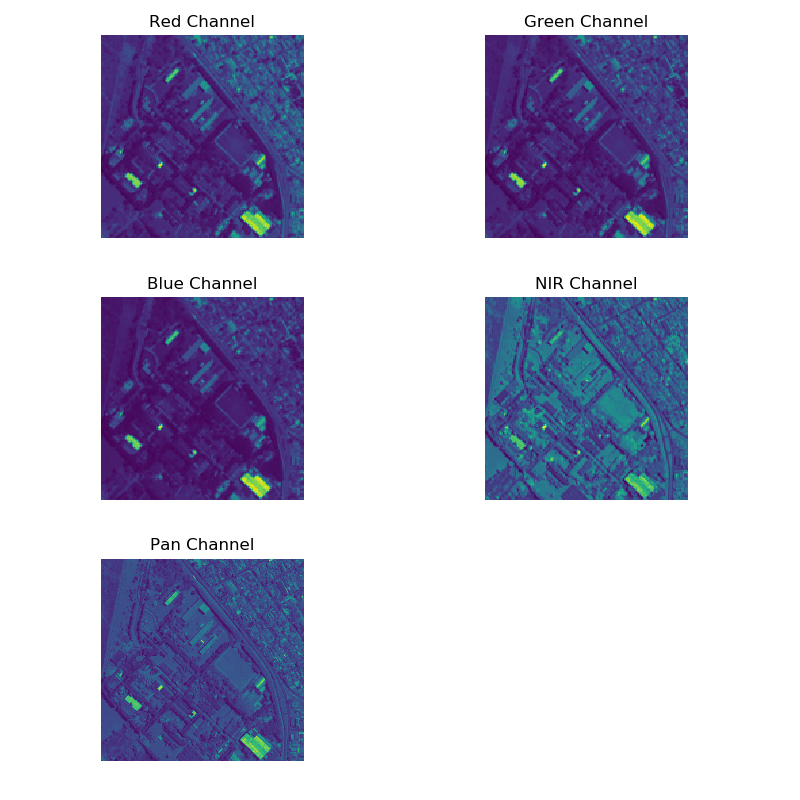

In [118]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3,2, figsize = (8,8))

ax1.imshow(img_raw_red)
ax1.set_axis_off()
ax1.set_title('Red Channel')

ax2.imshow(img_raw_grn)
ax2.set_axis_off()
ax2.set_title('Green Channel')

ax3.imshow(img_raw_blu)
ax3.set_axis_off()
ax3.set_title('Blue Channel')

ax4.imshow(img_raw_nir)
ax4.set_axis_off()
ax4.set_title('NIR Channel')

ax5.imshow(img_raw_pan)
ax5.set_axis_off()
ax5.set_title('Pan Channel')

ax6.axis('off')
fig.tight_layout()

Putting the Channels together to into 2 pictures (R,G,B) and (NIR,R,G)

In [42]:
img_rgb = multichannel(img_raw_red,img_raw_grn,img_raw_blu)
img_nrg = multichannel(img_raw_nir,img_raw_red,img_raw_blu)

Checking if everything works

<IPython.core.display.Javascript object>


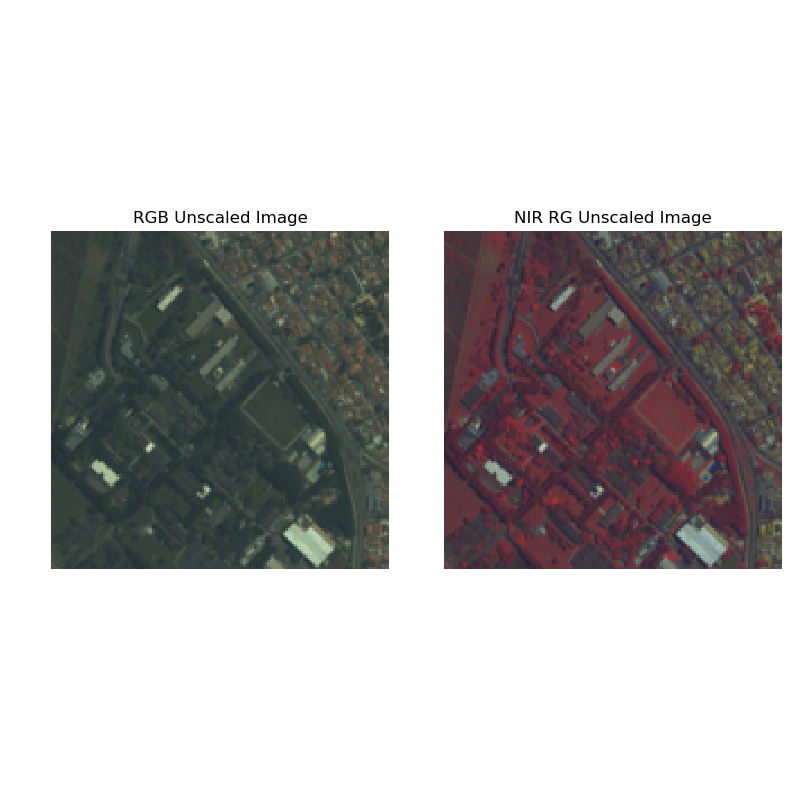

In [56]:
fig, axis = plt.subplots(1,2, figsize=(8,8))

axis[0].imshow(img_rgb)
axis[0].set_title('RGB Unscaled Image')
axis[0].set_axis_off()
axis[1].imshow(img_nrg)
axis[1].set_axis_off()
axis[1].set_title('NIR RG Unscaled Image')
fig.tight_layout()

Resizing the images to the same size as PAN using 3 different interpolation methods: nearest neighborhood, bilinear, bicubic

In [64]:
img_rgb_resize_nn = cv2.resize((img_rgb).astype('float'),img_raw_pan.shape,interpolation = cv2.INTER_NEAREST)
img_rgb_resize_bl = cv2.resize((img_rgb).astype('float'),img_raw_pan.shape,interpolation = cv2.INTER_LINEAR)
img_rgb_resize_bc = cv2.resize((img_rgb).astype('float'),img_raw_pan.shape,interpolation = cv2.INTER_CUBIC)

In [65]:
img_nrg_resize_nn = cv2.resize((img_nrg).astype('float'),img_raw_pan.shape,interpolation = cv2.INTER_NEAREST)
img_nrg_resize_bl = cv2.resize((img_nrg).astype('float'),img_raw_pan.shape,interpolation = cv2.INTER_LINEAR)
img_nrg_resize_bc = cv2.resize((img_nrg).astype('float'),img_raw_pan.shape,interpolation = cv2.INTER_CUBIC)

<IPython.core.display.Javascript object>


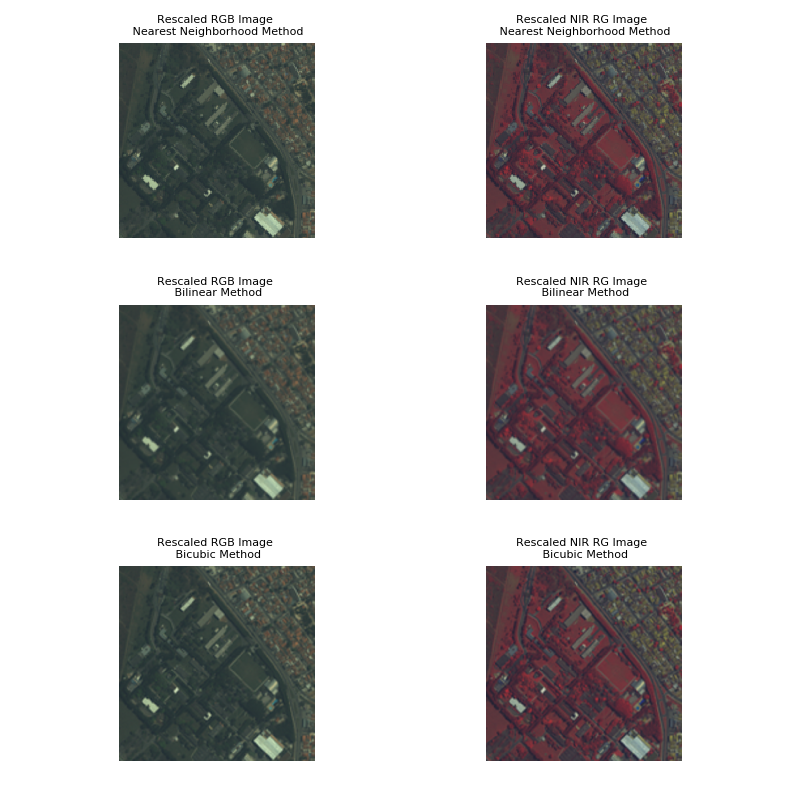

In [108]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3,2, figsize = (8,8))

ax1.imshow(img_rgb_resize_nn)
ax1.set_axis_off()
ax1.set_title('Rescaled RGB Image \n Nearest Neighborhood Method', fontsize = 8)

ax3.imshow(img_rgb_resize_bl)
ax3.set_axis_off()
ax3.set_title('Rescaled RGB Image \n Bilinear Method', fontsize = 8)

ax5.imshow(img_rgb_resize_bc)
ax5.set_axis_off()
ax5.set_title('Rescaled RGB Image \n Bicubic Method', fontsize = 8)

ax2.imshow(img_nrg_resize_nn)
ax2.set_axis_off()
ax2.set_title('Rescaled NIR RG Image \n Nearest Neighborhood Method', fontsize = 8)

ax4.imshow(img_nrg_resize_bl)
ax4.set_axis_off()
ax4.set_title('Rescaled NIR RG Image \n Bilinear Method', fontsize = 8)


ax6.imshow(img_nrg_resize_bc)
ax6.set_axis_off()
ax6.set_title('Rescaled NIR RG Image \n Bicubic Method', fontsize = 8)

fig.tight_layout()

In [148]:
img_Pan_rgb_nn = pansharpening_HSV(img_rgb_resize_nn,img_raw_pan)
img_Pan_rgb_bl = pansharpening_HSV(img_rgb_resize_bl,img_raw_pan)
img_Pan_rgb_bc = pansharpening_HSV(img_rgb_resize_bc,img_raw_pan)

In [149]:
img_Pan_nrg_nn = pansharpening_HSV(img_nrg_resize_nn,img_raw_pan)
img_Pan_nrg_bl = pansharpening_HSV(img_nrg_resize_bl,img_raw_pan)
img_Pan_nrg_bc = pansharpening_HSV(img_nrg_resize_bc,img_raw_pan)

<IPython.core.display.Javascript object>


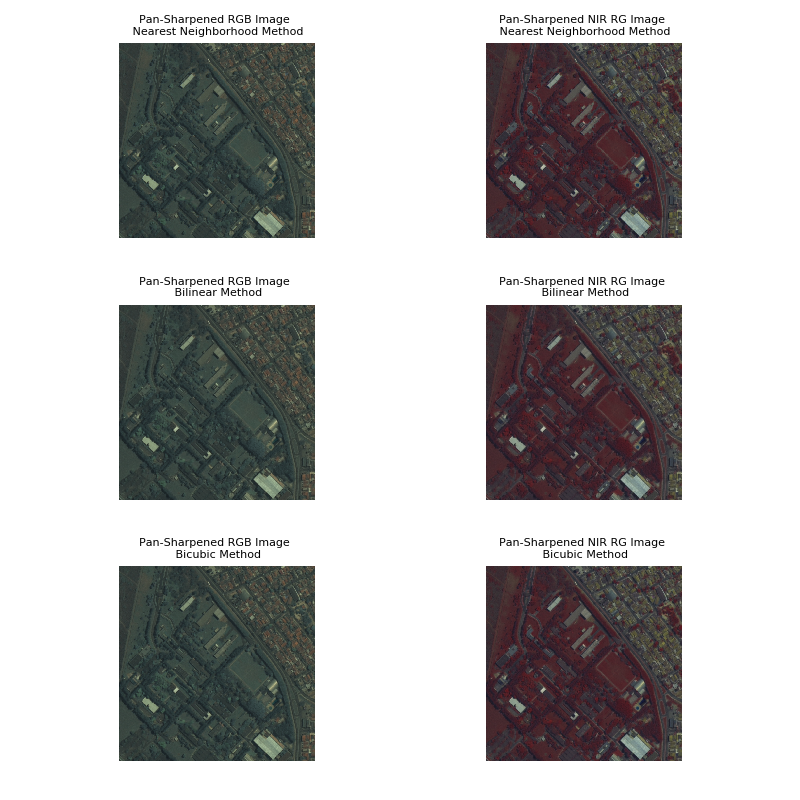

In [150]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3,2, figsize = (8,8))

ax1.imshow(img_Pan_rgb_nn)
ax1.set_axis_off()
ax1.set_title('Pan-Sharpened RGB Image \n Nearest Neighborhood Method', fontsize = 8)

ax3.imshow(img_Pan_rgb_bl)
ax3.set_axis_off()
ax3.set_title('Pan-Sharpened RGB Image \n Bilinear Method', fontsize = 8)

ax5.imshow(img_Pan_rgb_bc)
ax5.set_axis_off()
ax5.set_title('Pan-Sharpened RGB Image \n Bicubic Method', fontsize = 8)

ax2.imshow(img_Pan_nrg_nn)
ax2.set_axis_off()
ax2.set_title('Pan-Sharpened NIR RG Image \n Nearest Neighborhood Method', fontsize = 8)

ax4.imshow(img_Pan_nrg_bl)
ax4.set_axis_off()
ax4.set_title('Pan-Sharpened NIR RG Image \n Bilinear Method', fontsize = 8)


ax6.imshow(img_Pan_nrg_bc)
ax6.set_axis_off()
ax6.set_title('Pan-Sharpened NIR RG Image \n Bicubic Method', fontsize = 8)

fig.tight_layout()

In [152]:
pca = PCA(n_components=2)

In [162]:
principalComponents_img = pca.fit_transform(img_rgb_resize_bc.reshape((360000,3)))

In [163]:
principalComponents_img

array([[-0.05989167, -0.00634424],
       [-0.0599849 , -0.00639562],
       [-0.0603837 , -0.00661869],
       ...,
       [ 0.15007473, -0.00412305],
       [ 0.15769145, -0.00487229],
       [ 0.15922685, -0.00502707]])

In [182]:
test = img_raw_pan.reshape(360000)

In [183]:
principalComponents_img[:,0] = test

In [185]:
test_img = pca.inverse_transform(principalComponents_img)

<IPython.core.display.Javascript object>


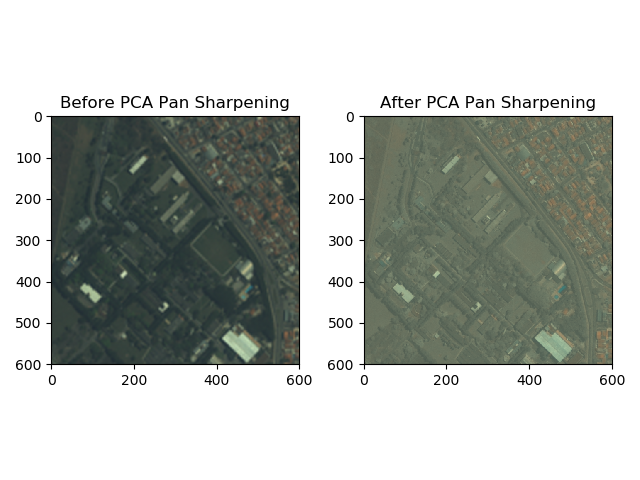

In [193]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(img_rgb_resize_bc)
axis[0].set_title('Before PCA Pan Sharpening')
axis[1].imshow(test_img.reshape(600,600,3))
axis[1].set_title('After PCA Pan Sharpening')
fig.tight_layout()
plt.savefig('pca_pan.png')